In [1]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [2]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

indusNetModel=models.Sequential()

indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Flatten())
indusNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
indusNetModel.add(layers.Dropout(0.2))
indusNetModel.add(layers.Dense(7, activation='softmax'))

indusNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
indusNetModel.summary()

filepath="IndusNet_7_classes_100_100_2nd Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 128)       0         
_________________________________________________________________
dropout (Dropout)    

In [3]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [4]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

In [5]:
import math

history = indusNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
175/175 [==============================] - 46s 263ms/step - loss: 1.9643 - categorical_accuracy: 0.1568 - val_loss: 1.9654 - val_categorical_accuracy: 0.1321
Epoch 2/400
175/175 [==============================] - 34s 194ms/step - loss: 1.8254 - categorical_accuracy: 0.2411 - val_loss: 1.6903 - val_categorical_accuracy: 0.3714
Epoch 3/400
175/175 [==============================] - 34s 193ms/step - loss: 1.4911 - categorical_accuracy: 0.3911 - val_loss: 1.3723 - val_categorical_accuracy: 0.4357
Epoch 4/400
175/175 [==============================] - 34s 193ms/step - loss: 1.4158 - categorical_accuracy: 0.4011 - val_loss: 1.3192 - val_categorical_accuracy: 0.4536
Epoch 5/400
175/175 [==============================] - 33s 191ms/step - loss: 1.3920 - categorical_accuracy: 0.4304 - val_loss: 1.3555 - val_categorical_accuracy: 0.4607
Epoch 6/400
175/175 [==============================] - 34s 195ms/step - loss: 1.3292 - categorical_acc

175/175 [==============================] - 34s 191ms/step - loss: 0.7523 - categorical_accuracy: 0.7268 - val_loss: 0.6959 - val_categorical_accuracy: 0.7357
Epoch 31/400
175/175 [==============================] - 33s 191ms/step - loss: 0.7713 - categorical_accuracy: 0.7329 - val_loss: 0.7812 - val_categorical_accuracy: 0.7500
Epoch 32/400
175/175 [==============================] - 34s 195ms/step - loss: 0.7413 - categorical_accuracy: 0.7314 - val_loss: 0.6505 - val_categorical_accuracy: 0.7607
Epoch 33/400
175/175 [==============================] - 33s 191ms/step - loss: 0.7198 - categorical_accuracy: 0.7368 - val_loss: 0.6603 - val_categorical_accuracy: 0.7393
Epoch 34/400
175/175 [==============================] - 34s 195ms/step - loss: 0.7349 - categorical_accuracy: 0.7357 - val_loss: 0.6444 - val_categorical_accuracy: 0.7607
Epoch 35/400
175/175 [==============================] - 34s 193ms/step - loss: 0.7105 - categorical_accuracy: 0.7421 - val_loss: 0.8430 - val_categorical_accu

175/175 [==============================] - 34s 191ms/step - loss: 0.5106 - categorical_accuracy: 0.8225 - val_loss: 0.6715 - val_categorical_accuracy: 0.7821
Epoch 61/400
175/175 [==============================] - 33s 191ms/step - loss: 0.5020 - categorical_accuracy: 0.8361 - val_loss: 0.5583 - val_categorical_accuracy: 0.8071
Epoch 62/400
175/175 [==============================] - 34s 192ms/step - loss: 0.4670 - categorical_accuracy: 0.8350 - val_loss: 0.5530 - val_categorical_accuracy: 0.8214
Epoch 63/400
175/175 [==============================] - 34s 193ms/step - loss: 0.4807 - categorical_accuracy: 0.8375 - val_loss: 0.5553 - val_categorical_accuracy: 0.8286
Epoch 64/400
175/175 [==============================] - 35s 199ms/step - loss: 0.4618 - categorical_accuracy: 0.8400 - val_loss: 0.5128 - val_categorical_accuracy: 0.8107
Epoch 65/400
175/175 [==============================] - 34s 192ms/step - loss: 0.4676 - categorical_accuracy: 0.8482 - val_loss: 0.5306 - val_categorical_accu

Epoch 90/400
175/175 [==============================] - 34s 195ms/step - loss: 0.3297 - categorical_accuracy: 0.8946 - val_loss: 0.4159 - val_categorical_accuracy: 0.8786
Epoch 91/400
175/175 [==============================] - 33s 191ms/step - loss: 0.3500 - categorical_accuracy: 0.8889 - val_loss: 0.4204 - val_categorical_accuracy: 0.8786
Epoch 92/400
175/175 [==============================] - 34s 192ms/step - loss: 0.3358 - categorical_accuracy: 0.8857 - val_loss: 0.4625 - val_categorical_accuracy: 0.8607
Epoch 93/400
175/175 [==============================] - 34s 194ms/step - loss: 0.3235 - categorical_accuracy: 0.8950 - val_loss: 0.5077 - val_categorical_accuracy: 0.8357
Epoch 94/400
175/175 [==============================] - 34s 195ms/step - loss: 0.3383 - categorical_accuracy: 0.8893 - val_loss: 0.4913 - val_categorical_accuracy: 0.8643
Epoch 95/400
175/175 [==============================] - 34s 195ms/step - loss: 0.3169 - categorical_accuracy: 0.8936 - val_loss: 0.4366 - val_cat

175/175 [==============================] - 34s 195ms/step - loss: 0.2435 - categorical_accuracy: 0.9268 - val_loss: 0.4347 - val_categorical_accuracy: 0.8786
Epoch 121/400
175/175 [==============================] - 34s 195ms/step - loss: 0.2453 - categorical_accuracy: 0.9264 - val_loss: 0.5071 - val_categorical_accuracy: 0.8714
Epoch 122/400
175/175 [==============================] - 34s 195ms/step - loss: 0.2860 - categorical_accuracy: 0.9154 - val_loss: 0.4384 - val_categorical_accuracy: 0.8750
Epoch 123/400
175/175 [==============================] - 34s 195ms/step - loss: 0.2628 - categorical_accuracy: 0.9171 - val_loss: 0.3982 - val_categorical_accuracy: 0.9179
Epoch 124/400
175/175 [==============================] - 34s 195ms/step - loss: 0.2292 - categorical_accuracy: 0.9314 - val_loss: 0.3990 - val_categorical_accuracy: 0.8821
Epoch 125/400
175/175 [==============================] - 34s 195ms/step - loss: 0.2463 - categorical_accuracy: 0.9261 - val_loss: 0.4531 - val_categorical

Epoch 150/400
175/175 [==============================] - 33s 191ms/step - loss: 0.1998 - categorical_accuracy: 0.9425 - val_loss: 0.3767 - val_categorical_accuracy: 0.8964
Epoch 151/400
175/175 [==============================] - 33s 191ms/step - loss: 0.2105 - categorical_accuracy: 0.9386 - val_loss: 0.4366 - val_categorical_accuracy: 0.8643
Epoch 152/400
175/175 [==============================] - 33s 191ms/step - loss: 0.1944 - categorical_accuracy: 0.9443 - val_loss: 0.4353 - val_categorical_accuracy: 0.8750
Epoch 153/400
175/175 [==============================] - 33s 191ms/step - loss: 0.1973 - categorical_accuracy: 0.9425 - val_loss: 0.3769 - val_categorical_accuracy: 0.8964
Epoch 154/400
175/175 [==============================] - 33s 191ms/step - loss: 0.1908 - categorical_accuracy: 0.9454 - val_loss: 0.4113 - val_categorical_accuracy: 0.8857
Epoch 155/400
175/175 [==============================] - 33s 191ms/step - loss: 0.1873 - categorical_accuracy: 0.9471 - val_loss: 0.3934 - v

175/175 [==============================] - 34s 193ms/step - loss: 0.1386 - categorical_accuracy: 0.9579 - val_loss: 0.5218 - val_categorical_accuracy: 0.8821
Epoch 180/400
175/175 [==============================] - 34s 193ms/step - loss: 0.1752 - categorical_accuracy: 0.9539 - val_loss: 0.5051 - val_categorical_accuracy: 0.8714
Epoch 181/400
175/175 [==============================] - 34s 194ms/step - loss: 0.1622 - categorical_accuracy: 0.9539 - val_loss: 0.5896 - val_categorical_accuracy: 0.8714
Epoch 182/400
175/175 [==============================] - 34s 195ms/step - loss: 0.1952 - categorical_accuracy: 0.9461 - val_loss: 0.4851 - val_categorical_accuracy: 0.9179
Epoch 183/400
175/175 [==============================] - 34s 196ms/step - loss: 0.1581 - categorical_accuracy: 0.9582 - val_loss: 0.4390 - val_categorical_accuracy: 0.8786
Epoch 184/400
175/175 [==============================] - 34s 196ms/step - loss: 0.1710 - categorical_accuracy: 0.9507 - val_loss: 0.6511 - val_categorical

175/175 [==============================] - 32s 182ms/step - loss: 0.1643 - categorical_accuracy: 0.9525 - val_loss: 0.4019 - val_categorical_accuracy: 0.9143
Epoch 210/400
175/175 [==============================] - 32s 182ms/step - loss: 0.1351 - categorical_accuracy: 0.9618 - val_loss: 0.3719 - val_categorical_accuracy: 0.9107
Epoch 211/400
175/175 [==============================] - 32s 182ms/step - loss: 0.1274 - categorical_accuracy: 0.9657 - val_loss: 0.4297 - val_categorical_accuracy: 0.8929
Epoch 212/400
175/175 [==============================] - 32s 182ms/step - loss: 0.1583 - categorical_accuracy: 0.9593 - val_loss: 0.3706 - val_categorical_accuracy: 0.9143
Epoch 213/400
175/175 [==============================] - 32s 182ms/step - loss: 0.1064 - categorical_accuracy: 0.9718 - val_loss: 0.5588 - val_categorical_accuracy: 0.8893
Epoch 214/400
175/175 [==============================] - 32s 182ms/step - loss: 0.1481 - categorical_accuracy: 0.9639 - val_loss: 0.5086 - val_categorical

175/175 [==============================] - 40s 230ms/step - loss: 0.1210 - categorical_accuracy: 0.9643 - val_loss: 0.5153 - val_categorical_accuracy: 0.9179
Epoch 240/400
175/175 [==============================] - 40s 229ms/step - loss: 0.1126 - categorical_accuracy: 0.9664 - val_loss: 0.4231 - val_categorical_accuracy: 0.9143
Epoch 241/400
175/175 [==============================] - 40s 230ms/step - loss: 0.0928 - categorical_accuracy: 0.9775 - val_loss: 0.5216 - val_categorical_accuracy: 0.8964
Epoch 242/400
175/175 [==============================] - 40s 230ms/step - loss: 0.1304 - categorical_accuracy: 0.9639 - val_loss: 0.5323 - val_categorical_accuracy: 0.8929
Epoch 243/400
175/175 [==============================] - 40s 230ms/step - loss: 0.1209 - categorical_accuracy: 0.9696 - val_loss: 0.5700 - val_categorical_accuracy: 0.8464
Epoch 244/400
175/175 [==============================] - 40s 229ms/step - loss: 0.1183 - categorical_accuracy: 0.9693 - val_loss: 0.3981 - val_categorical

175/175 [==============================] - 34s 194ms/step - loss: 0.1033 - categorical_accuracy: 0.9779 - val_loss: 0.4537 - val_categorical_accuracy: 0.8964
Epoch 270/400
175/175 [==============================] - 34s 194ms/step - loss: 0.0970 - categorical_accuracy: 0.9714 - val_loss: 0.7595 - val_categorical_accuracy: 0.8500
Epoch 271/400
175/175 [==============================] - 34s 194ms/step - loss: 0.1100 - categorical_accuracy: 0.9704 - val_loss: 0.4059 - val_categorical_accuracy: 0.9143
Epoch 272/400
175/175 [==============================] - 34s 194ms/step - loss: 0.1260 - categorical_accuracy: 0.9679 - val_loss: 0.4929 - val_categorical_accuracy: 0.8929
Epoch 273/400
175/175 [==============================] - 34s 194ms/step - loss: 0.1070 - categorical_accuracy: 0.9679 - val_loss: 0.4557 - val_categorical_accuracy: 0.9179
Epoch 274/400
175/175 [==============================] - 34s 194ms/step - loss: 0.0998 - categorical_accuracy: 0.9754 - val_loss: 0.4473 - val_categorical

Epoch 299/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0713 - categorical_accuracy: 0.9829 - val_loss: 0.4597 - val_categorical_accuracy: 0.9107
Epoch 300/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0769 - categorical_accuracy: 0.9821 - val_loss: 0.5004 - val_categorical_accuracy: 0.9179
Epoch 301/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0938 - categorical_accuracy: 0.9789 - val_loss: 0.5379 - val_categorical_accuracy: 0.8821
Epoch 302/400
175/175 [==============================] - 34s 195ms/step - loss: 0.1195 - categorical_accuracy: 0.9707 - val_loss: 0.4222 - val_categorical_accuracy: 0.9179
Epoch 303/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0712 - categorical_accuracy: 0.9829 - val_loss: 0.4929 - val_categorical_accuracy: 0.9250
Epoch 304/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0669 - categorical_accuracy: 0.9846 - val_loss: 0.4640 - v

175/175 [==============================] - 34s 195ms/step - loss: 0.0834 - categorical_accuracy: 0.9811 - val_loss: 0.4179 - val_categorical_accuracy: 0.9214
Epoch 330/400
175/175 [==============================] - 34s 194ms/step - loss: 0.0624 - categorical_accuracy: 0.9886 - val_loss: 0.3969 - val_categorical_accuracy: 0.9464
Epoch 331/400
175/175 [==============================] - 34s 193ms/step - loss: 0.1009 - categorical_accuracy: 0.9764 - val_loss: 0.4592 - val_categorical_accuracy: 0.9000
Epoch 332/400
175/175 [==============================] - 34s 194ms/step - loss: 0.0795 - categorical_accuracy: 0.9786 - val_loss: 0.4330 - val_categorical_accuracy: 0.9250
Epoch 333/400
175/175 [==============================] - 34s 194ms/step - loss: 0.0731 - categorical_accuracy: 0.9825 - val_loss: 0.4727 - val_categorical_accuracy: 0.9000
Epoch 334/400
175/175 [==============================] - 34s 195ms/step - loss: 0.1151 - categorical_accuracy: 0.9693 - val_loss: 0.4489 - val_categorical

175/175 [==============================] - 34s 195ms/step - loss: 0.0695 - categorical_accuracy: 0.9818 - val_loss: 0.5130 - val_categorical_accuracy: 0.9179
Epoch 360/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0972 - categorical_accuracy: 0.9771 - val_loss: 0.7719 - val_categorical_accuracy: 0.8679
Epoch 361/400
175/175 [==============================] - 34s 194ms/step - loss: 0.1293 - categorical_accuracy: 0.9661 - val_loss: 0.4300 - val_categorical_accuracy: 0.9214
Epoch 362/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0949 - categorical_accuracy: 0.9761 - val_loss: 0.4110 - val_categorical_accuracy: 0.9179
Epoch 363/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0688 - categorical_accuracy: 0.9843 - val_loss: 0.6660 - val_categorical_accuracy: 0.9000
Epoch 364/400
175/175 [==============================] - 35s 200ms/step - loss: 0.0705 - categorical_accuracy: 0.9871 - val_loss: 0.4766 - val_categorical

Epoch 389/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0710 - categorical_accuracy: 0.9825 - val_loss: 0.3409 - val_categorical_accuracy: 0.9214
Epoch 390/400
175/175 [==============================] - 34s 195ms/step - loss: 0.1096 - categorical_accuracy: 0.9768 - val_loss: 0.4554 - val_categorical_accuracy: 0.9036
Epoch 391/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0714 - categorical_accuracy: 0.9800 - val_loss: 0.6681 - val_categorical_accuracy: 0.8857
Epoch 392/400
175/175 [==============================] - 34s 196ms/step - loss: 0.0593 - categorical_accuracy: 0.9882 - val_loss: 0.4055 - val_categorical_accuracy: 0.9393
Epoch 393/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0689 - categorical_accuracy: 0.9857 - val_loss: 0.3754 - val_categorical_accuracy: 0.9214
Epoch 394/400
175/175 [==============================] - 34s 195ms/step - loss: 0.0656 - categorical_accuracy: 0.9861 - val_loss: 0.6528 - v

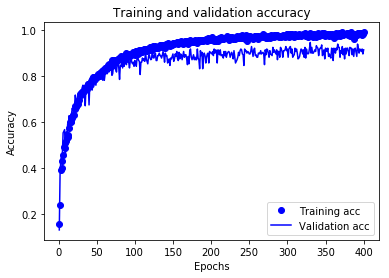

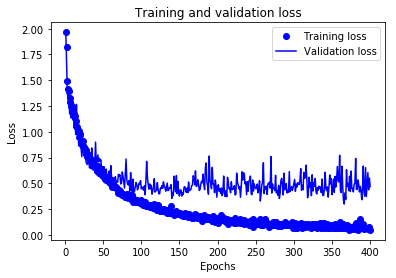

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
from tensorflow.python.keras.models import load_model

best_model = load_model('IndusNet_7_classes_100_100_2nd Experiment.h5')

In [8]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

35/35 [==============================] - 4s 122ms/step - loss: 0.4053 - categorical_accuracy: 0.9232
Test-set accuracy: 92.32%


In [9]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of labels: (560, 1)


In [10]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

560/560 [==============================] - 3s 5ms/sample - loss: 0.4053 - categorical_accuracy: 0.9232
Loss on test set:  0.40531098887856515
Accuracy on test set:  0.92321426


In [11]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(560,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

560/560 [==============================] - 2s 4ms/sample
(560, 1)
(560, 1)


<Figure size 3600x2400 with 0 Axes>

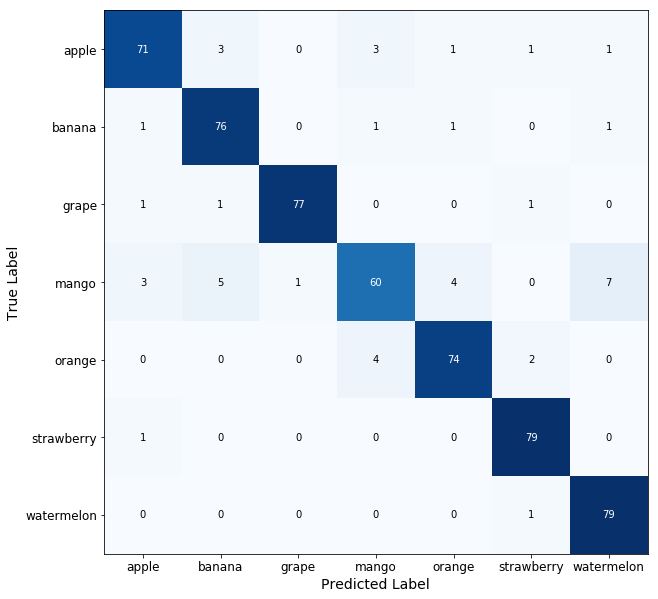

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure(dpi=600)
plot_confusion_matrix(cm,figsize=(12,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.yticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.xlabel('Predicted Label',fontsize=14)
plt.ylabel('True Label',fontsize=14)
plt.savefig('IndusNet_7 classes_100_100_2nd Experiment.jpeg',dpi=1200)
plt.show()